In [2]:
import pandas as pd
%pylab inline
rcParams['figure.figsize'] = 9, 7

Populating the interactive namespace from numpy and matplotlib


In [3]:
result_df =  pd.read_csv("results/mtry_cpu.csv")

In [4]:
result_df[0:1]

,nsamples,nvars,mtry,ntrees,ncores,count,oob,duration
0,5000,2500000,0.1,100,128,0,0.261,108.927


In [5]:
result_df['trees_by_hour'] = 3600*100.0/result_df['duration']

In [6]:
oob_and_duration_nested = result_df.groupby(['mtry', 'ncores']).mean()[['duration', 'trees_by_hour','oob']]
oob_and_duration_nested


duration  trees_by_hour     oob
mtry ncores                                  
0.10 16       708.2716     509.828477  0.2610
     32       340.0086    1060.306506  0.2610
     64       186.0142    1946.865069  0.2610
     128      134.4706    2758.007235  0.2610
0.25 16      1134.8944     317.564873  0.2056
     32       535.0180     674.687432  0.2056
     64       270.7854    1330.221098  0.2056
     128      179.5924    2038.849937  0.2056
0.50 16      1724.0604     209.012343  0.1878
     32       856.5674     420.666804  0.1878
     64       428.6656     845.451891  0.1878
     128      243.8064    1498.782664  0.1878
0.80 16      2313.4762     155.706224  0.1850
     32      1125.7038     320.094682  0.1850
     64       569.1076     632.675703  0.1850
     128      364.5910    1021.954231  0.1850

In [7]:
oob_and_duration = oob_and_duration_nested.unstack()
oob_and_duration

duration                                trees_by_hour               \
ncores        16         32        64        128           16           32    
mtry                                                                          
0.10     708.2716   340.0086  186.0142  134.4706    509.828477  1060.306506   
0.25    1134.8944   535.0180  270.7854  179.5924    317.564873   674.687432   
0.50    1724.0604   856.5674  428.6656  243.8064    209.012343   420.666804   
0.80    2313.4762  1125.7038  569.1076  364.5910    155.706224   320.094682   

                                     oob                          
ncores          64           128     16      32      64      128  
mtry                                                              
0.10    1946.865069  2758.007235  0.2610  0.2610  0.2610  0.2610  
0.25    1330.221098  2038.849937  0.2056  0.2056  0.2056  0.2056  
0.50     845.451891  1498.782664  0.1878  0.1878  0.1878  0.1878  
0.80     632.675703  1021.954231  0.1850  0.1850  0.1850  0.1850

In [8]:
duration = oob_and_duration['duration']
duration.round(1)

ncores,16,32,64,128
mtry,,,,
0.10,708.3,340.0,186.0,134.5
0.25,1134.9,535.0,270.8,179.6
0.50,1724.1,856.6,428.7,243.8
0.80,2313.5,1125.7,569.1,364.6


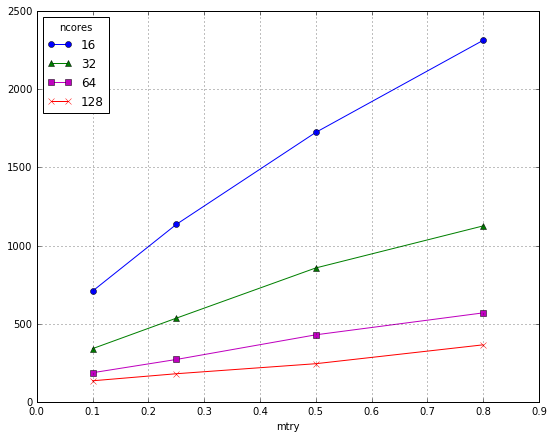

In [44]:
duration.plot(style=['bo-', 'g^-', 'ms-', 'rx-'], grid=True,  xlim= (0.0, 0.9))

In [10]:
trees_by_hour = oob_and_duration['trees_by_hour'].T
trees_by_hour

mtry,0.1,0.25,0.5,0.8
ncores,,,,
16,509.828477,317.564873,209.012343,155.706224
32,1060.306506,674.687432,420.666804,320.094682
64,1946.865069,1330.221098,845.451891,632.675703
128,2758.007235,2038.849937,1498.782664,1021.954231


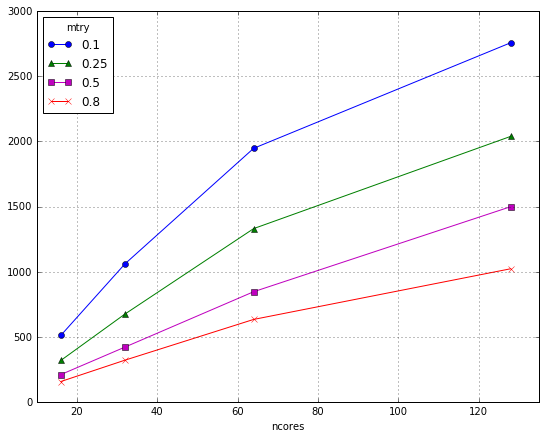

In [41]:
trees_by_hour.plot.line(style=['bo-', 'g^-', 'ms-', 'rx-'], grid=True, xlim= (10, 135), logx=False,)